# Linear Regression

This a **linear regression** model that will be used to **predicte crop yields** based on environmental factors such as rainfall, pesticide usage, and average temperature to assist farmers and policymakers in making data-driven decisions for agricultural optimization.

In [1]:
# import section
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle

ModuleNotFoundError: No module named 'google'

In [2]:
# Mount Google Drive to access
drive.mount("/content/drive")


path = "/content/drive/MyDrive/ALU/yield_df.csv"


Mounted at /content/drive


In [3]:
### Reading dataset
data = pd.read_csv(path)

# Preview dataset
data.head(20)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [ ]:
data.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
data.dtypes

,0
Unnamed: 0,int64
Area,object
Item,object
Year,int64
hg/ha_yield,int64
average_rain_fall_mm_per_year,float64
pesticides_tonnes,float64
avg_temp,float64


In [ ]:
# let see the columns names
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
# Assuming 'hg/ha_yield' is the target variable
Y = data['hg/ha_yield']

# Assuming 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp' are the independent variable
X = data.drop(columns=["hg/ha_yield"])
X.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [ ]:
# Changing non numerical columns into boolians
non_numerical_columns = ['Area', 'Item']

# One-hot encode
data_categorical = pd.get_dummies(data[non_numerical_columns], drop_first=True)

 # Drop original columns
data = data.drop(columns=non_numerical_columns)

# Add the encoded columns
data = pd.concat([data, data_categorical], axis=1)

In [ ]:
# Now let see new X
X = data.drop(columns=["hg/ha_yield"])
X.head()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Area_Zimbabwe,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,1485.0,121.0,16.37,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1990,1485.0,121.0,16.37,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1990,1485.0,121.0,16.37,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1990,1485.0,121.0,16.37,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1990,1485.0,121.0,16.37,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Convert boolean columns to integers (True -> 1, False -> 0)
data = data.astype(int)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia',
       ...
       'Area_Zimbabwe', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=115)

Before i first used all of these variables Year,average_rain_fall_mm_per_year,
       pesticides_tonnes, avg_temp, Area_Algeria, Area_Angola,Area_Argentina,Area_Armenia,Area_Zimbabwe, Item_Maize, Item_Plantains and others,
       Item_Potatoes, Item_Rice, paddy, Item_Sorghum, Item_Soybeans,
       Item_Sweet potatoes, Item_Wheat, Item_Yams
and then **got very high values of** Linear Regression MSE,Linear Regression R²,
Decision Tree MSE,Decision Tree R²,Random Forest MSE,Random Forest R²

**So I decided to do  calculate correlation and Drop unnecessary columns**

Correlation with target variable 'hg/ha_yield':
hg/ha_yield            1.000000
Item_Potatoes          0.610305
Area_United Kingdom    0.174819
Item_Sweet potatoes    0.166936
Area_Japan             0.114743
                         ...   
Item_Rice, paddy      -0.157857
Item_Maize            -0.198230
Item_Wheat            -0.219730
Item_Sorghum          -0.238777
Item_Soybeans         -0.254849
Name: hg/ha_yield, Length: 114, dtype: float64


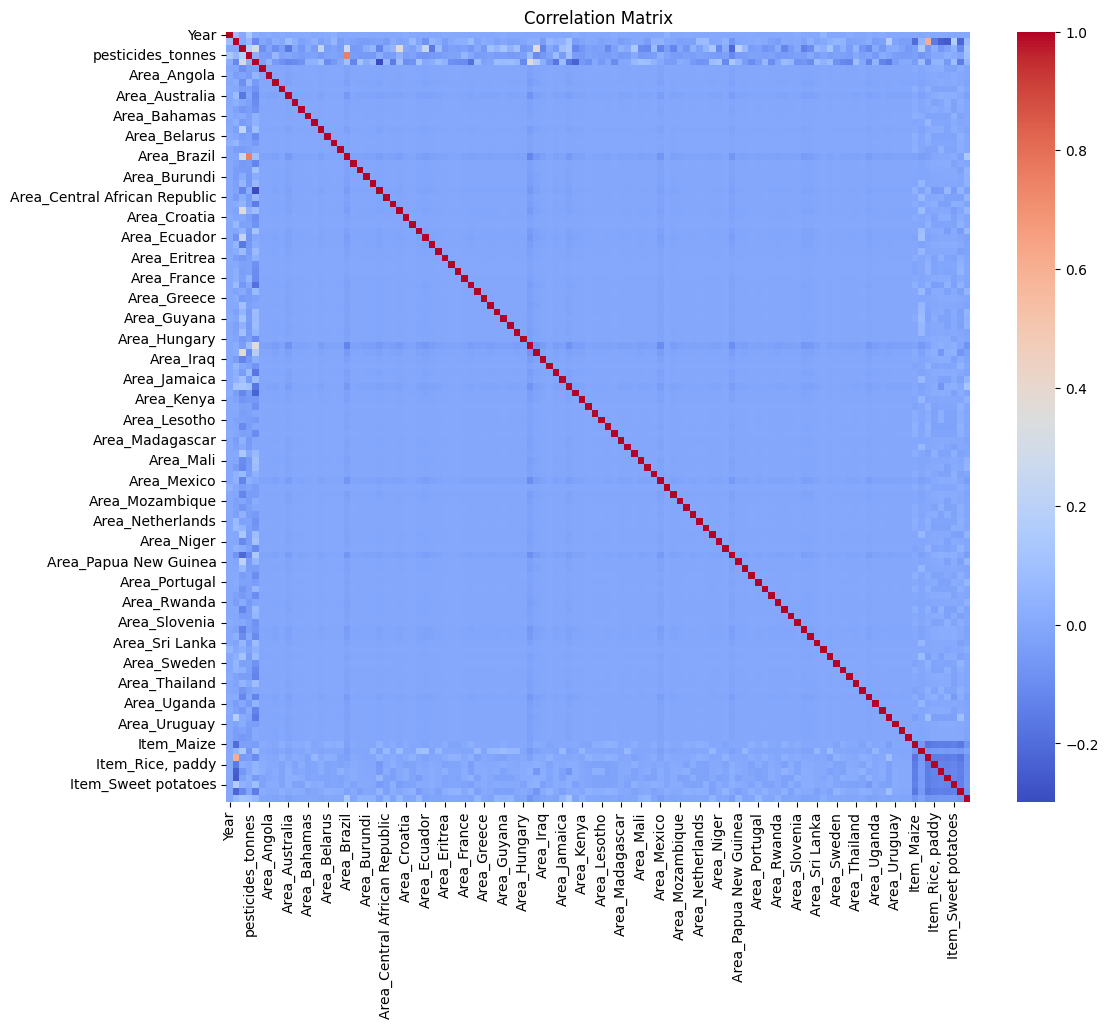


Top 5 features most correlated with 'hg/ha_yield':
Item_Potatoes          0.610305
Area_United Kingdom    0.174819
Item_Sweet potatoes    0.166936
Area_Japan             0.114743
Year                   0.091630
Name: hg/ha_yield, dtype: float64


In [ ]:
# Drop unnecessary columns and calculate correlation
correlation_matrix = data.drop(columns=['Unnamed: 0']).corr()

# Correlation with the target variable
target_correlation = correlation_matrix['hg/ha_yield'].sort_values(ascending=False)
print("Correlation with target variable 'hg/ha_yield':")
print(target_correlation)

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Top correlated features
top_features = target_correlation[1:6]  # Top 5 features excluding the target
print("\nTop 5 features most correlated with 'hg/ha_yield':")
print(top_features)


So i'm going to proceed with the Top 5 features most correlated with 'hg/ha_yield'

In [ ]:
# Select top features based on correlation
selected_features = [ 'Item_Potatoes','Area_United Kingdom', 'Item_Sweet potatoes', 'Area_Japan', 'Year']
X = data[selected_features]
Y = data['hg/ha_yield']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(Y_test, lr_preds))
print("Linear Regression R²:", r2_score(Y_test, lr_preds))

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(Y_test, dt_preds))
print("Decision Tree R²:", r2_score(Y_test, dt_preds))

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, Y_train)
rf_preds = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(Y_test, rf_preds))
print("Random Forest R²:", r2_score(Y_test, rf_preds))

Linear Regression MSE: 3711605684.2128024
Linear Regression R²: 0.48831354669460647
Decision Tree MSE: 3587078023.0878544
Decision Tree R²: 0.5054810808242334
Random Forest MSE: 3589241649.736195
Random Forest R²: 0.5051828006349678


Still got very high values of Linear Regression MSE,
Decision Tree MSE and Random Forest MSE.

So let apply some techniques to reduce values of Linear Regression MSE,
Decision Tree MSE and Random Forest MSE.

In [ ]:
# Normalize Target Variable
scaler_y = MinMaxScaler()
data['hg/ha_yield_scaled'] = scaler_y.fit_transform(data[['hg/ha_yield']])

# Select Features (add more features based on correlation)
selected_features = [
    'Item_Potatoes', 'Area_United Kingdom', 'Item_Sweet potatoes', 'Area_Japan',
    'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'
]
X = data[selected_features]
Y = data['hg/ha_yield_scaled']

# Scale Features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(Y_test, lr_preds))
print("Linear Regression R²:", r2_score(Y_test, lr_preds))

# Decision Tree (with tuning)
dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_dt.fit(X_train, Y_train)
dt_best = grid_dt.best_estimator_
dt_preds = dt_best.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(Y_test, dt_preds))
print("Decision Tree R²:", r2_score(Y_test, dt_preds))

# Random Forest (with tuning)
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train, Y_train)
rf_best = grid_rf.best_estimator_
rf_preds = rf_best.predict(X_test)
print("Random Forest MSE:", mean_squared_error(Y_test, rf_preds))
print("Random Forest R²:", r2_score(Y_test, rf_preds))

Linear Regression MSE: 0.014620505768605905
Linear Regression R²: 0.493350856304104
Decision Tree MSE: 0.008804827988674716
Decision Tree R²: 0.6948834307476174
Random Forest MSE: 0.008328404340608355
Random Forest R²: 0.7113930944452715


In [ ]:
# Make predictions on scaled target variable
lr_preds_scaled = lr.predict(X_test)
dt_preds_scaled = dt_best.predict(X_test)
rf_preds_scaled = rf_best.predict(X_test)

# Scale predictions back to original range
lr_preds_original = scaler_y.inverse_transform(lr_preds_scaled.reshape(-1, 1))
dt_preds_original = scaler_y.inverse_transform(dt_preds_scaled.reshape(-1, 1))
rf_preds_original = scaler_y.inverse_transform(rf_preds_scaled.reshape(-1, 1))



In [ ]:
print("Linear Regression Predictions (Original Scale):", lr_preds_original[:5])
print("Decision Tree Predictions (Original Scale):", dt_preds_original[:5])
print("Random Forest Predictions (Original Scale):", rf_preds_original[:5])


Linear Regression Predictions (Original Scale): [[ 52082.02693515]
 [ 36739.4508428 ]
 [ 54548.26520185]
 [204124.32420486]
 [113856.19576867]]
Decision Tree Predictions (Original Scale): [[ 47895.62698413]
 [ 22958.41525424]
 [ 61878.73333333]
 [180802.3       ]
 [ 61417.06976744]]
Random Forest Predictions (Original Scale): [[ 50855.02403634]
 [ 23339.42495853]
 [ 58112.77788009]
 [164442.11893139]
 [ 59520.98383883]]


In [ ]:
# Save the best-performing model
best_model = rf_best  # Assuming Random Forest performed the best
model_path = "/content/drive/MyDrive/best_model.pkl"

# Save the model using pickle
with open(model_path, "wb") as file:
    pickle.dump(best_model, file)

# Confirm successful saving
print(f"\nBest model saved to: {model_path}")


Best model saved to: /content/drive/MyDrive/best_model.pkl


In [ ]:
# Save the scaler for features (X) and target (Y)
scaler_X_path = "/content/drive/MyDrive/scaler_X.pkl"
scaler_y_path = "/content/drive/MyDrive/scaler_y.pkl"

# Save the scalers
with open(scaler_X_path, "wb") as file:
    pickle.dump(scaler_X, file)

with open(scaler_y_path, "wb") as file:
    pickle.dump(scaler_y, file)

print(f"Scalers saved to {scaler_X_path} and {scaler_y_path}")


Scalers saved to /content/drive/MyDrive/scaler_X.pkl and /content/drive/MyDrive/scaler_y.pkl


In [ ]:
# Load the saved model and scalers
model_path = "/content/drive/MyDrive/best_model.pkl"
scaler_X_path = "/content/drive/MyDrive/scaler_X.pkl"
scaler_y_path = "/content/drive/MyDrive/scaler_y.pkl"

# Load the model
with open(model_path, "rb") as file:
    model = pickle.load(file)

# Load the scalers
with open(scaler_X_path, "rb") as file:
    scaler_X = pickle.load(file)

with open(scaler_y_path, "rb") as file:
    scaler_y = pickle.load(file)

# Example input data (ensure feature order matches training data)
example_data = {
    "Item_Potatoes": 1,  # Example: 1 if this item is Potatoes, 0 otherwise
    "Area_United Kingdoms": 1,  # Example: 1 if the area is UK, 0 otherwise
    "Item_Sweet potatoes": 1,  # Example: 1 if this item is Sweet potatoes, 0 otherwise
    "Area_Japan": 1,  # Example: 1 if the area is Japan, 0 otherwise
    "Years": 2024,  # Example year
    "average_rain_fall_mm_per_year": 800.0,  # Example rainfall in mm
    "pesticides_tonnes": 50.0,  # Example pesticide usage in tonnes
    "avg_temp": 25.0  # Example average temperature in Celsius
}

# Convert input data into a NumPy array
input_features = np.array([
    example_data["Item_Potatoes"],
    example_data["Area_United Kingdoms"],
    example_data["Item_Sweet potatoes"],
    example_data["Area_Japan"],
    example_data["Years"],
    example_data["average_rain_fall_mm_per_year"],
    example_data["pesticides_tonnes"],
    example_data["avg_temp"]
]).reshape(1, -1)

# Scale features using the loaded feature scaler
X_scaled = scaler_X.transform(input_features)

# Predict using the loaded model
predicted_yield_scaled = model.predict(X_scaled)

# Reverse scaling for the target variable
predicted_yield = scaler_y.inverse_transform(predicted_yield_scaled.reshape(-1, 1))[0][0]

# Display the prediction
print(f"Predicted Crop Yield (hg/ha): {predicted_yield:.2f}")


Predicted Crop Yield (hg/ha): 56271.52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
